数字图像处理 第三次实验记录
# 空域图像增强技术

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

def show_img(img, title):
    if title is not None:
        plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.show()

def show_imgs(img_and_title):
    plt.figure(dpi=150)
    sz = len(img_and_title)
    for i in range(0, sz):
        plt.subplot(1, sz, i+1)
        img = img_and_title[i][0]
        title = img_and_title[i][1]
        if title is not None:
            plt.title(title)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
        plt.xticks([])
        plt.yticks([])
    plt.show()

1.2D 卷积

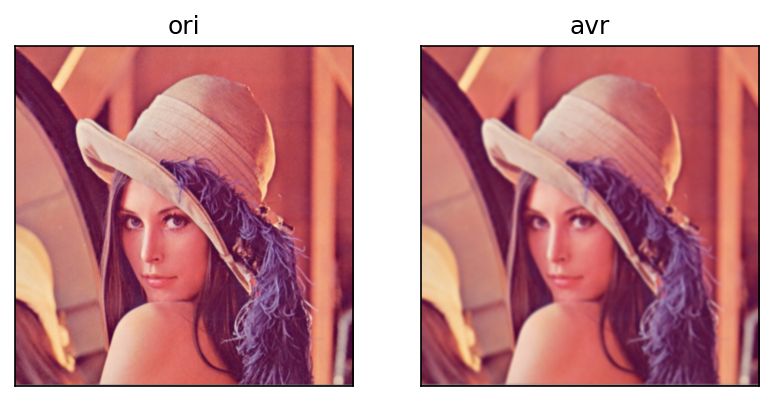

In [46]:
img = cv2.imread('lena.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

show_imgs([[img, "ori"], [dst, "avr"]])

2.图像模糊（图像平滑）

2.1. 平均

练习：运行上面的程序，尝试改为 5*5 的卷积框并比较运行效果；查阅 cv2.boxFilter 函
数的使用方法，并尝试改用此函数实现上面的效果。

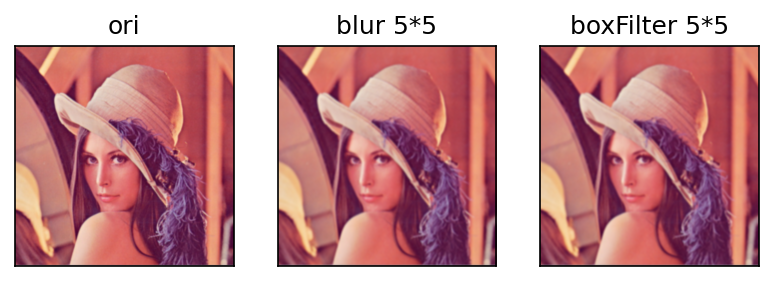

In [47]:
blur = cv2.blur(img,(5,5))
blur2 = cv2.boxFilter(img, -1, (5, 5), normalize=True)
show_imgs([[img, "ori"], [blur, "blur 5*5"], [blur2, "boxFilter 5*5"]])

2.2 高斯平滑

练习：查阅 cv2.getGaussianKernel()函数的用法，尝试利用 cv2.getGaussianKernel()生
成二维高斯核，实现利用生成的高斯核进行图像高斯平滑处理。

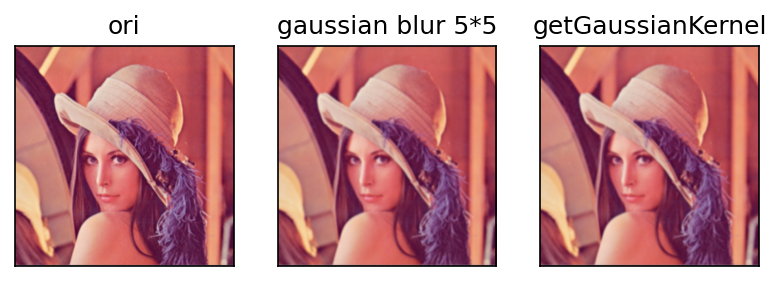

In [48]:
kernel_size = 7
sigma = 0.3 * ((kernel_size - 1) * 0.5 - 1) + 0.8
blur_gaussian = cv2.GaussianBlur(img,(kernel_size,kernel_size),0)
blur_gaussian2 = cv2.filter2D(img, -1, cv2.getGaussianKernel(kernel_size, sigma))

show_imgs([[img, "ori"], [blur_gaussian, "gaussian blur 5*5"], [blur_gaussian, "getGaussianKernel"]])

2.3 中值滤波

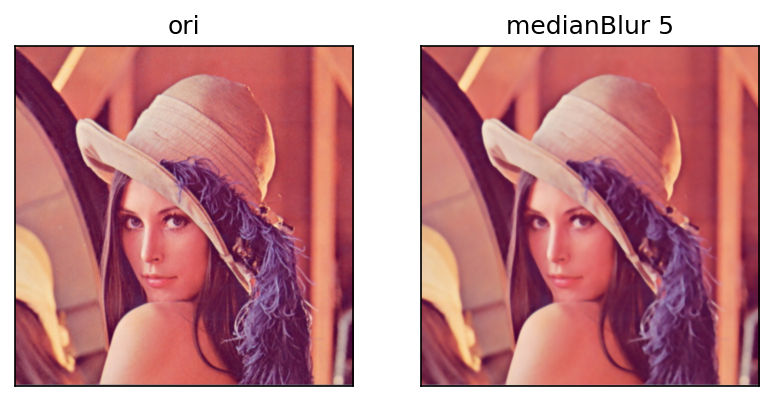

In [49]:
mblur = cv2.medianBlur(img,5)
show_imgs([[img, "ori"], [mblur, "medianBlur 5"]])

3 图像梯度

3.1 Roberts 算子

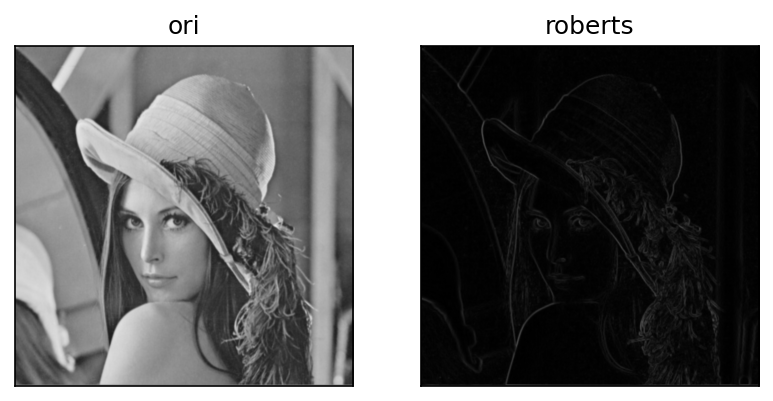

In [50]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Roberts 算子
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)

x = cv2.filter2D(img_gray, cv2.CV_16S, kernelx)
y = cv2.filter2D(img_gray, cv2.CV_16S, kernely)

absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

show_imgs([[img_gray, "ori"], [roberts, "roberts"]])

3.2 Prewitt 算子


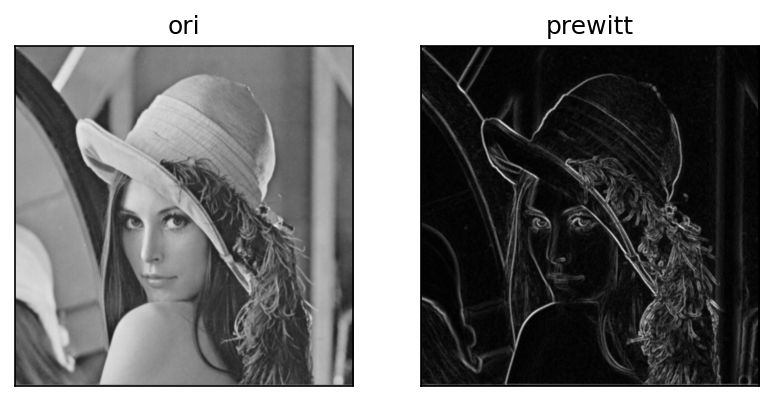

In [51]:
# Prewitt 算子
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)

x = cv2.filter2D(img_gray, cv2.CV_16S, kernelx)
y = cv2.filter2D(img_gray, cv2.CV_16S, kernely)

# 转 uint8 ,图像融合
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

show_imgs([[img_gray, "ori"], [prewitt, "prewitt"]])

3.3 Sobel 算子


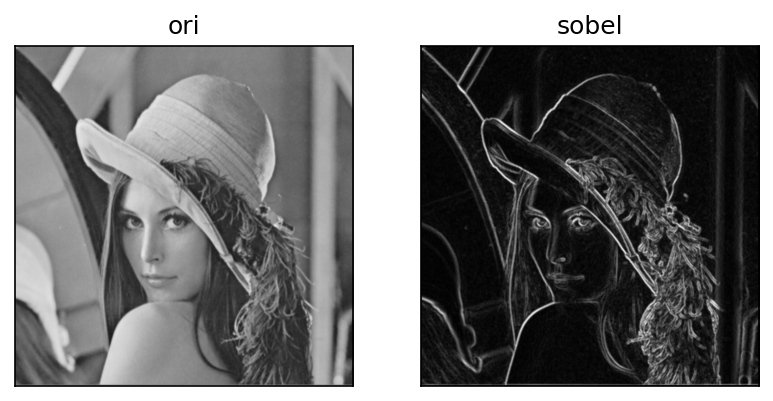

In [52]:
# Sobel 算子
x = cv2.Sobel(img_gray, cv2.CV_16S, 1, 0)
y = cv2.Sobel(img_gray, cv2.CV_16S, 0, 1)

# 转 uint8 ,图像融合
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

show_imgs([[img_gray, "ori"], [sobel, "sobel"]])

3.4 Laplacian 算子

练习;参照上面的例程，编写 ksize=3 的 Laplacian 算子进行图像锐化处理的程序。

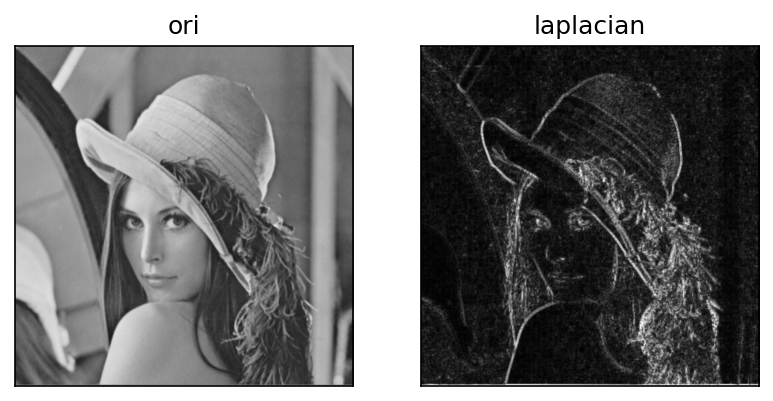

In [53]:
# Laplacian
dst = cv2.Laplacian(img_gray, cv2.CV_16S, ksize = 3)
laplacian = cv2.convertScaleAbs(dst)

show_imgs([[img_gray, "ori"], [laplacian, "laplacian"]])

3.5 对比总结


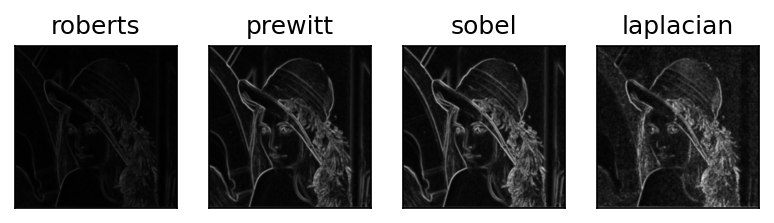

In [54]:
show_imgs([[roberts, "roberts"], [prewitt, "prewitt"], [sobel, "sobel"], [laplacian, "laplacian"]])

总结：Laplacian 算子对噪声比较敏感，由于其算法可能会出现双像素边界，常用来判
断边缘像素位于图像的明区或暗区，很少用于边缘检测；Robert 算子对陡峭的低噪声图像
效果较好，尤其是边缘正负 45 度较多的图像，但定位准确率较差；Prewitt 算子对灰度渐
变的图像边缘提取效果较好，而没有考虑相邻点的距离远近对当前像素点的影响；Sobel 算
子考虑了综合因素，对噪声较多的图像处理效果更好。